# Pakistani EDA

In [ ]:
import numpy as np
import pandas as pd
import sklearn.preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
import nltk
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
from keras.utils import np_utils
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Thesis/excel files/Bipolar data final.xlsx") 

In [ ]:
df.head()

Cases  Diagnosis  \
0  Patient displayed aggressive and violent behav...  Bipolar I   
1  The patient exhibited aggressive and violent b...  Bipolar I   
2  The patient had ADHD like systems and extremel...  Bipolar I   
3  The patient lacks the attention span and obser...  Bipolar I   
4  The patient showed several inability to focus ...  Bipolar I   

  Mood-Stabilizer Antipsychotic Sleeping pills  
0         Lithium      Seroquel       Rivotril  
1         Lithium      Seroquel       Rivotril  
2         Lithium      Seroquel       Rivotril  
3         Lithium      Seroquel       Rivotril  
4         Lithium      Seroquel       Rivotril

In [ ]:
df.tail()

Cases    Diagnosis  \
595  The patient tough extreme mood swings, athleti...  Cyclothymia   
596  The patient beat his family in a very crazy fr...  Cyclothymia   
597  The patient was obsessed with medicine in a fr...  Cyclothymia   
598  The patient lived in isolation, enjoying video...  Cyclothymia   
599  The patient violently attacked a friend throug...  Cyclothymia   

    Mood-Stabilizer Antipsychotic Sleeping pills  
595        Tegretol    Olanzapine         Atarax  
596        Tegretol    Olanzapine         Atarax  
597        Tegretol    Olanzapine         Atarax  
598        Tegretol    Olanzapine         Atarax  
599        Tegretol    Olanzapine         Atarax

In [ ]:
df['Diagnosis'].value_counts()

Bipolar I      200
BipolarII      200
Cyclothymia    200
Name: Diagnosis, dtype: int64

In [ ]:
df['Mood-Stabilizer'].value_counts()

Lithium     200
Epival      200
Tegretol    200
Name: Mood-Stabilizer, dtype: int64

In [ ]:
df['Antipsychotic'].value_counts()

Seroquel       200
Risperidone    200
Olanzapine     200
Name: Antipsychotic, dtype: int64

In [ ]:
df.dtypes

Cases              object
Diagnosis          object
Mood-Stabilizer    object
Antipsychotic      object
Sleeping pills     object
dtype: object

In [ ]:
df.shape

(600, 5)

In [ ]:
df.describe()

Cases  Diagnosis  \
count                                                 600        600   
unique                                                600          3   
top     Patient displayed aggressive and violent behav...  Bipolar I   
freq                                                    1        200   

       Mood-Stabilizer Antipsychotic Sleeping pills  
count              600           600            600  
unique               3             3              3  
top            Lithium      Seroquel       Rivotril  
freq               200           200            200

Text(0.5, 1.0, 'Diagnosis')

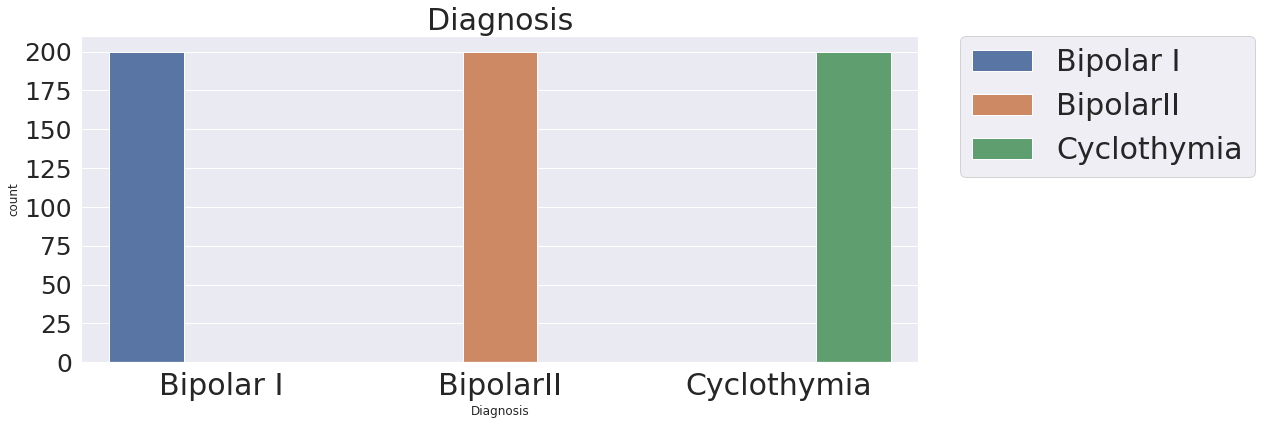

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="Diagnosis",hue="Diagnosis",data=df,)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title("Diagnosis",fontsize=30)

Text(0.5, 1.0, 'Mood Stabilizer')

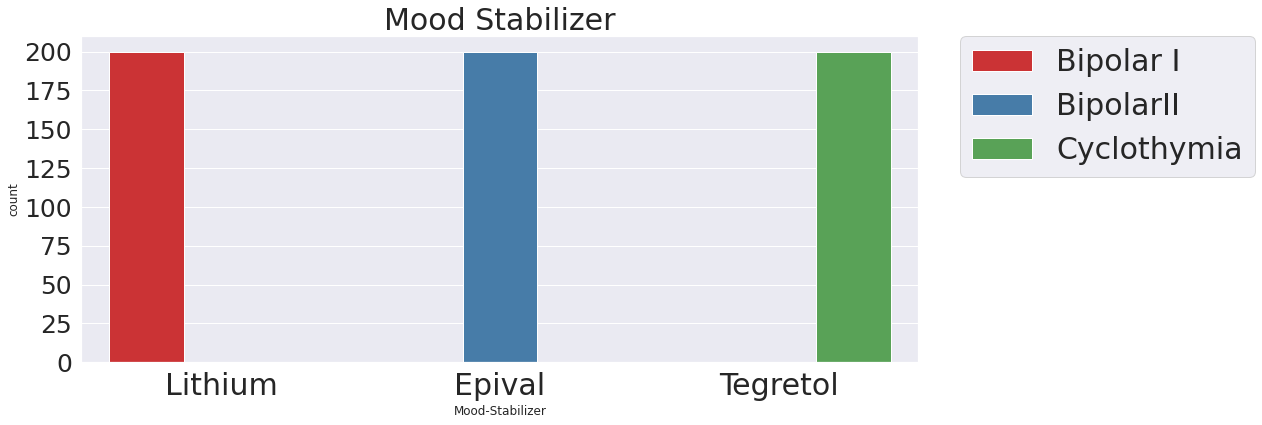

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="Mood-Stabilizer",hue="Diagnosis",data=df,palette="Set1")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title("Mood Stabilizer",fontsize=30)

Text(0.5, 1.0, 'Antipsychotic')

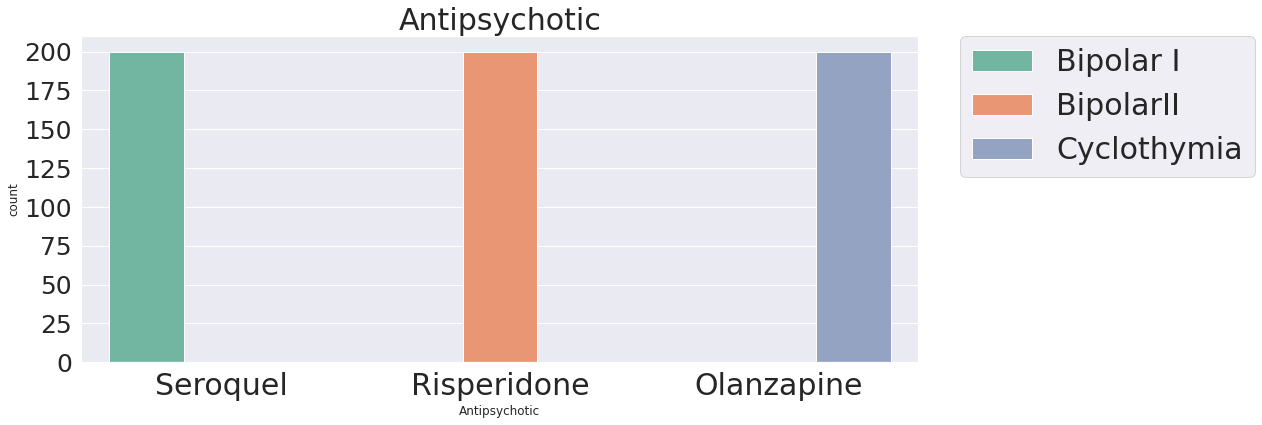

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="Antipsychotic",hue="Diagnosis",data=df,palette="Set2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title("Antipsychotic",fontsize=30)

Text(0.5, 1.0, 'Sleeping Pills')

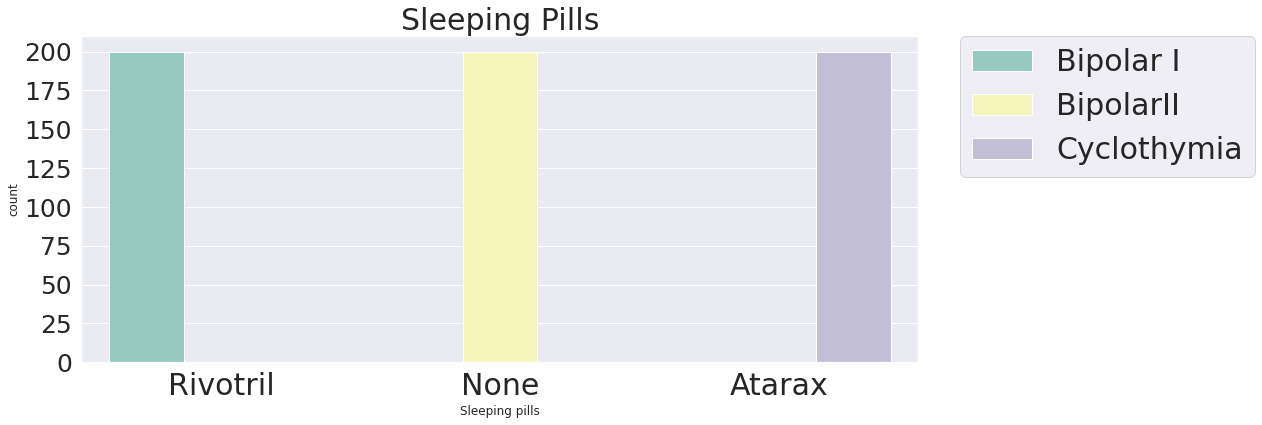

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="Sleeping pills",hue="Diagnosis",data=df,palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title("Sleeping Pills",fontsize=30)

In [ ]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df1 = df[['Cases','Diagnosis']]
df1.isnull().sum()

Cases        0
Diagnosis    0
dtype: int64

In [ ]:
df1.head()

Cases  Diagnosis
0  Patient displayed aggressive and violent behav...  Bipolar I
1  The patient exhibited aggressive and violent b...  Bipolar I
2  The patient had ADHD like systems and extremel...  Bipolar I
3  The patient lacks the attention span and obser...  Bipolar I
4  The patient showed several inability to focus ...  Bipolar I

In [ ]:
df1.tail()

Cases    Diagnosis
595  The patient tough extreme mood swings, athleti...  Cyclothymia
596  The patient beat his family in a very crazy fr...  Cyclothymia
597  The patient was obsessed with medicine in a fr...  Cyclothymia
598  The patient lived in isolation, enjoying video...  Cyclothymia
599  The patient violently attacked a friend throug...  Cyclothymia

In [ ]:
    #lower casing
    df['Cases'] = df['Cases'].str.lower()

    #punctuation removal         
    df["Cases"] = df["Cases"].apply(lambda text: remove_punctuation(text))

In [ ]:
df2=df1

In [ ]:
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(df2['Cases'].values)
X = tokenizer.texts_to_sequences(df2['Cases'].values)
X = pad_sequences(X)

In [ ]:
df2['encoded']=df2['Diagnosis'].apply(lambda x: 0 if x=='Bipolar I' else 1)
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Cases  Diagnosis  encoded
0  Patient displayed aggressive and violent behav...  Bipolar I        0
1  The patient exhibited aggressive and violent b...  Bipolar I        0
2  The patient had ADHD like systems and extremel...  Bipolar I        0
3  The patient lacks the attention span and obser...  Bipolar I        0
4  The patient showed several inability to focus ...  Bipolar I        0

In [ ]:
from sklearn.model_selection import train_test_split#stratify ensures balance between spam and no spam in test and train
xtrain, xtest, ytrain, ytest =train_test_split(df2['Cases'], df2['Diagnosis'], 
                                random_state=2018, 
                                test_size=0.3, 
                                stratify=df2['encoded'])

In [ ]:
pip install transformers


In [ ]:
pip install shap


In [ ]:
import transformers
import shap

In [ ]:
# load the model and tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained("bert-base-uncased", use_fast=True)
model = transformers.AutoModelForSequenceClassification.from_pretrained("bert-base-uncased",num_labels=3).cuda()

# build a pipeline object to do predictions
pred = transformers.pipeline("text-classification", model=model, tokenizer=tokenizer, device=0, return_all_scores=True)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
pred(df2['Cases'].iloc[0])

[[{'label': 'LABEL_0', 'score': 0.32495012879371643},
  {'label': 'LABEL_1', 'score': 0.3157295286655426},
  {'label': 'LABEL_2', 'score': 0.35932040214538574}]]

In [ ]:
explainer = shap.Explainer(pred)

In [ ]:
string=['The patient was experiencing extreme case of mania and had mood swings in between as well']

In [ ]:
df['Cases'][2:4]

2    the patient had adhd like systems and extremel...
3    the patient lacks the attention span and obser...
Name: Cases, dtype: object

In [ ]:
shap_values = explainer(df2['Cases'][:3])

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be usin

  0%|          | 0/248 [00:00<?, ?it/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be usin

  0%|          | 0/248 [00:00<?, ?it/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be usin

  0%|          | 0/248 [00:00<?, ?it/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be usin

In [ ]:
shap.plots.text(shap_values)

In [ ]:
shap.plots.text(shap_values[:, :, "LABEL_2"])

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
string=["Anger","mania","Violent","rage","sadjoy"]

In [ ]:
shap_values = explainer(string)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
You seem to be usin

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


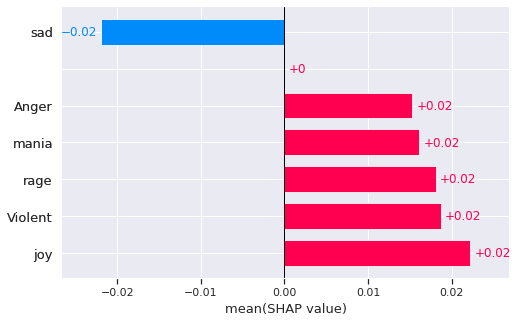

In [ ]:
shap.plots.bar(shap_values[:, :, "LABEL_2"].mean(0),order=shap.Explanation.argsort)